# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [8]:
df = pd.read_excel("Preprocesseddata.xlsx",sheet_name= "Sheet8")
Original = df.copy()
df.head()

,Country,gdp_per_capita ($)_1991,suicides/100k pop_1991,gdp_per_capita ($)_2011,suicides/100k pop_2011,Change in gdp_per_capita(2011 -1991),Change in Suicide rate(2011 -1991)
0,Argentina,6404,9.936667,13946,8.822500,7542,-1.114167
1,Austria,23808,29.622500,53923,17.624167,30115,-11.998333
2,Barbados,8469,6.410833,17708,0.000000,9239,-6.410833
3,Belgium,22523,22.001667,50893,18.892500,28370,-3.109167
4,Brazil,4490,5.695000,14245,6.034167,9755,0.339167


# Visualising Change in gdp_per_capita(2011 -1991) vs Change in Suicide rate(2011 -1991)

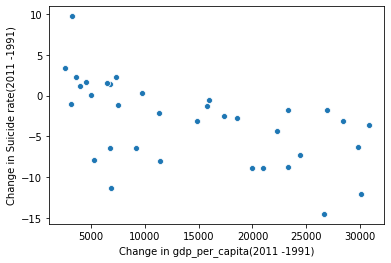

In [9]:
sns.scatterplot(x=df["Change in gdp_per_capita(2011 -1991)"], y= df["Change in Suicide rate(2011 -1991)"] ,data = df)

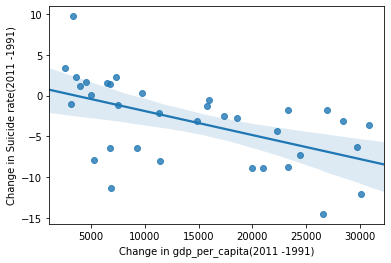

In [10]:
sns.regplot(x=df["Change in gdp_per_capita(2011 -1991)"], y= df["Change in Suicide rate(2011 -1991)"] ,data = df)

# Modelling change regression

In [11]:
import statsmodels.api as sm

X = df["Change in gdp_per_capita(2011 -1991)"]
Y = df["Change in Suicide rate(2011 -1991)"]
X = sm.add_constant(X)

ols= sm.OLS(endog=Y, exog = X)

result = ols.fit()

result.summary()

C:\Users\Arun-Windows\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Change in Suicide rate(2011 -1991)   R-squared:                       0.295
Model:                                            OLS   Adj. R-squared:                  0.274
Method:                                 Least Squares   F-statistic:                     13.84
Date:                                Wed, 10 Jun 2020   Prob (F-statistic):           0.000740
Time:                                        14:38:53   Log-Likelihood:                -99.754
No. Observations:                                  35   AIC:                             203.5
Df Residuals:                                      33   BIC:                             206.6
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    1.0671      1.354      0.788      0.436      -1.687       3.822
Change in gdp_per_capita(2011 -1991)    -0.0003   7.92e-05     -3.720      0.001      -0.000      -0.000
==============================================================================
Omnibus:                        1.889   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                1.325
Skew:                          -0.477   Prob(JB):                        0.516
Kurtosis:                       3.001   Cond. No.                     3.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""